Dataset shape: (5000, 9)


,Age,YearsAtCompany,JobSatisfaction,WorkLifeBalance,MonthlyIncome,OverTime,DistanceFromHome,PromotionLast5Years,Attrition
0,58,9,1,4,17618,Yes,21,0,Yes
1,48,14,2,3,13027,No,17,0,No
2,34,6,2,2,16986,No,22,0,No
3,27,3,2,1,15400,No,5,0,No
4,40,2,1,2,6526,No,24,0,No



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  5000 non-null   int64 
 1   YearsAtCompany       5000 non-null   int64 
 2   JobSatisfaction      5000 non-null   int64 
 3   WorkLifeBalance      5000 non-null   int64 
 4   MonthlyIncome        5000 non-null   int64 
 5   OverTime             5000 non-null   object
 6   DistanceFromHome     5000 non-null   int64 
 7   PromotionLast5Years  5000 non-null   int64 
 8   Attrition            5000 non-null   object
dtypes: int64(7), object(2)
memory usage: 351.7+ KB
None

--- Missing values ---
Age                    0
YearsAtCompany         0
JobSatisfaction        0
WorkLifeBalance        0
MonthlyIncome          0
OverTime               0
DistanceFromHome       0
PromotionLast5Years    0
Attrition              0
dtype: int64

--- Summary statistic

,Age,YearsAtCompany,JobSatisfaction,WorkLifeBalance,MonthlyIncome,DistanceFromHome,PromotionLast5Years
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,39.726200,6.947800,2.476800,2.518400,11717.118800,15.042800,0.188000
std,11.506299,4.281722,1.131069,1.115845,4971.000135,8.361373,0.390751
min,20.000000,0.000000,1.000000,1.000000,3012.000000,1.000000,0.000000
25%,30.000000,3.000000,1.000000,2.000000,7373.750000,8.000000,0.000000
50%,40.000000,7.000000,2.000000,3.000000,11868.500000,15.000000,0.000000
75%,50.000000,11.000000,3.000000,4.000000,16046.000000,22.000000,0.000000
max,59.000000,14.000000,4.000000,4.000000,19998.000000,29.000000,1.000000


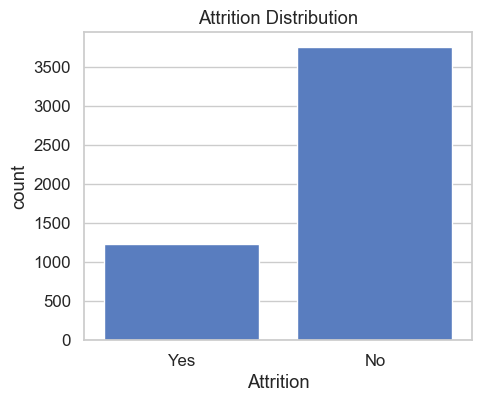


Attrition ratio:
 Attrition
No     0.7524
Yes    0.2476
Name: proportion, dtype: float64


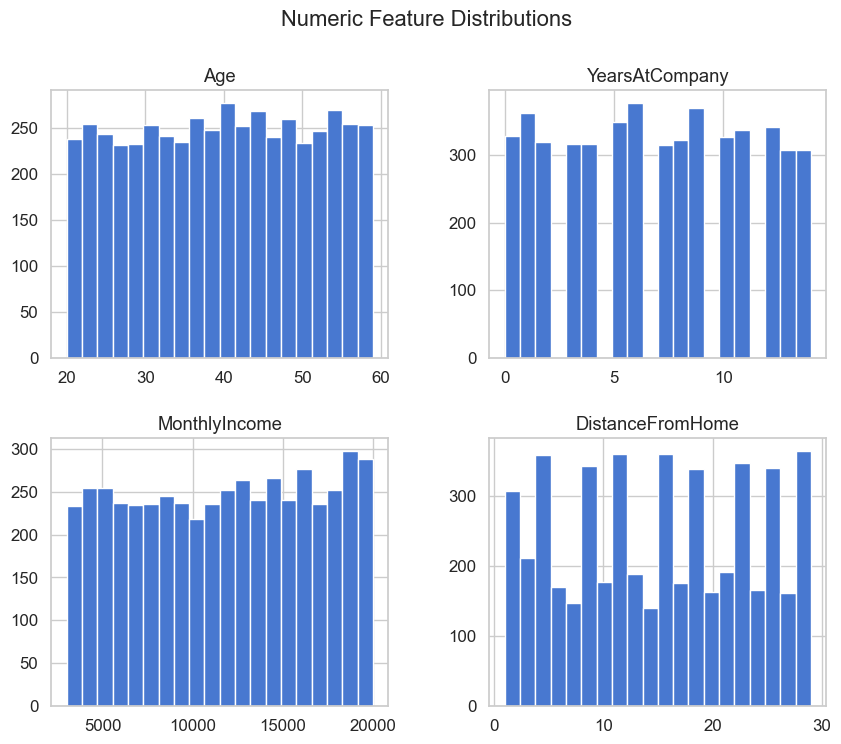

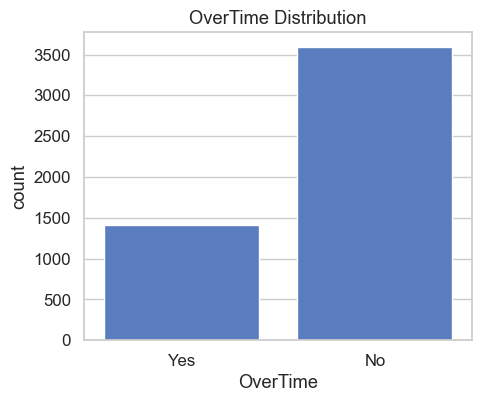

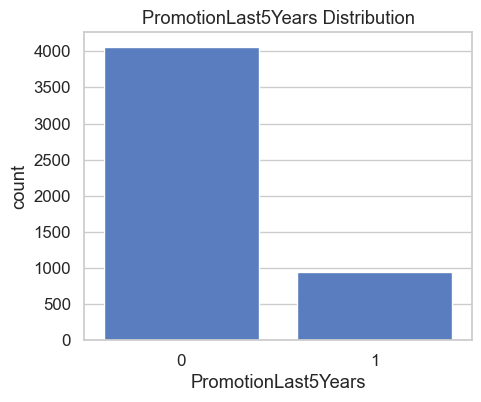

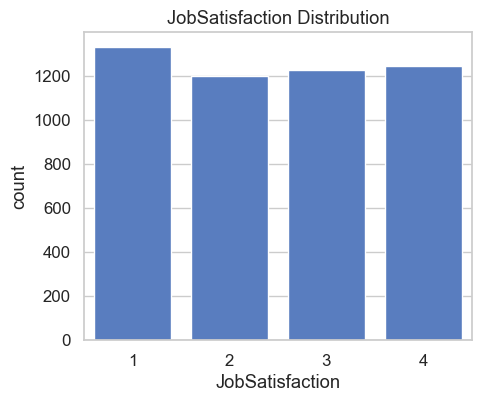

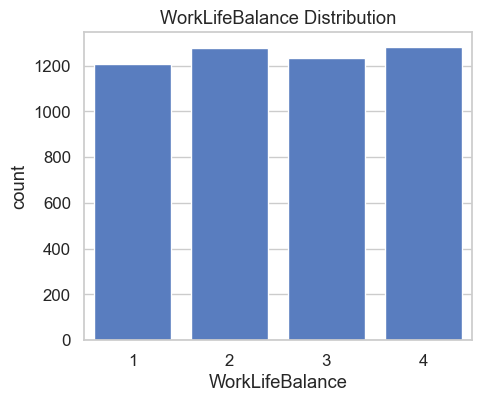

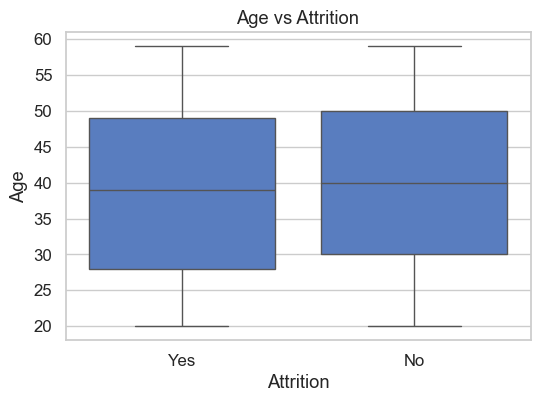

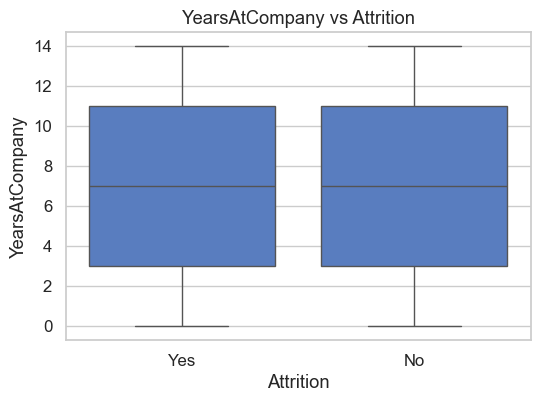

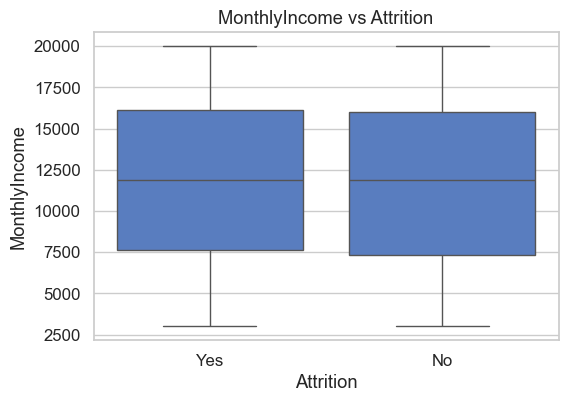

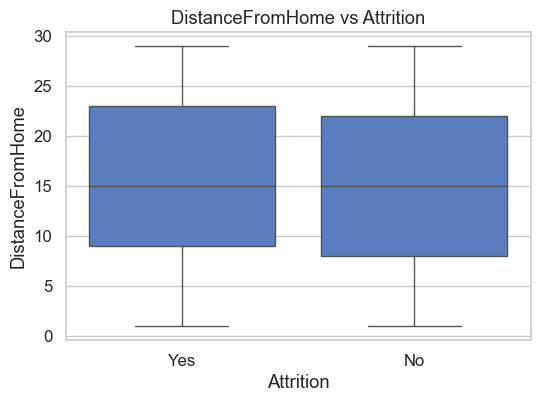

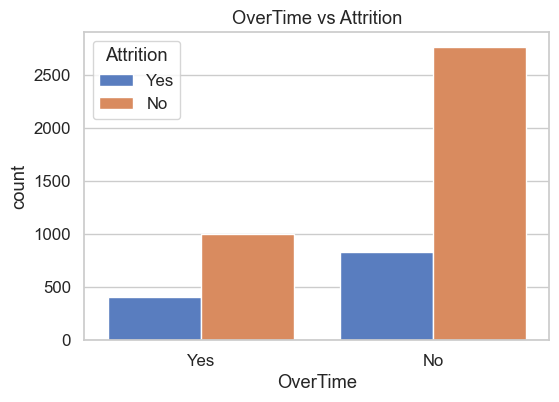

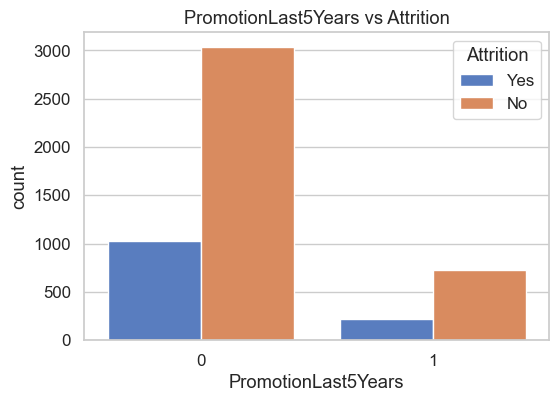

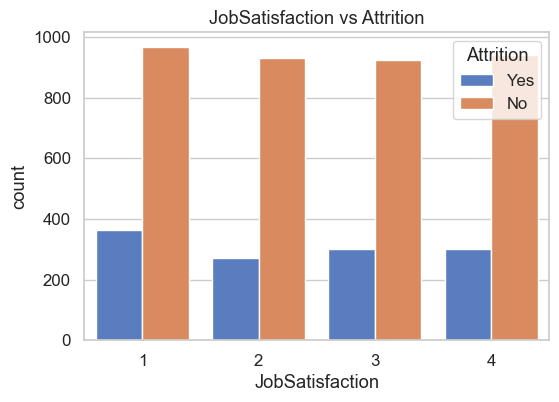

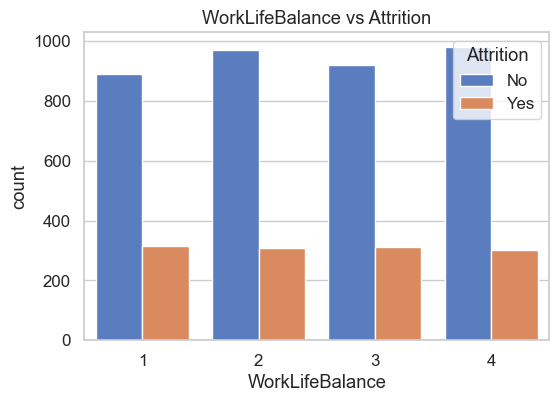

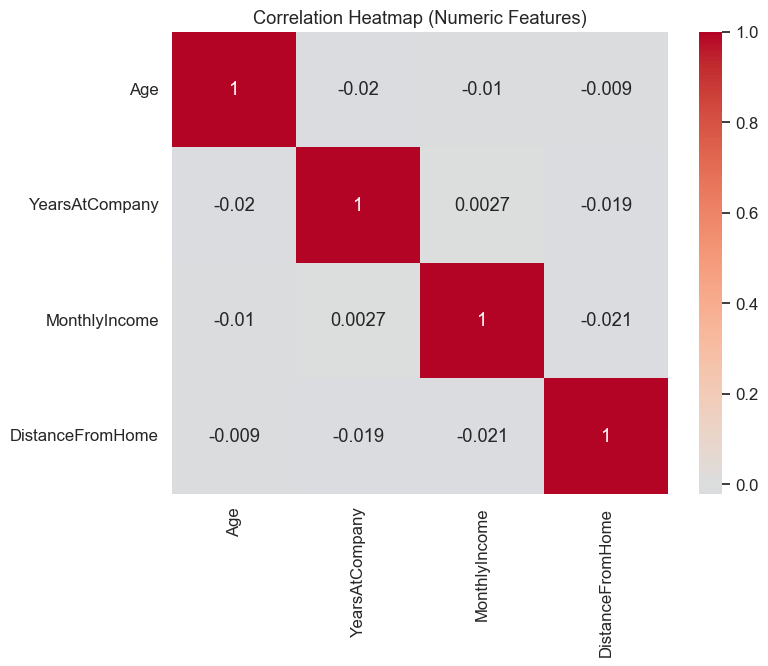


Average values grouped by Attrition:



,Age,YearsAtCompany,MonthlyIncome,DistanceFromHome
Attrition,,,,
No,40.032164,6.959862,11705.144870,14.918926
Yes,38.796446,6.911147,11753.504847,15.419225


In [1]:
# notebooks/eda.ipynb

# Step 0. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# better plot style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Step 1. Load dataset
df = pd.read_csv("../data/employees.csv")

print("Dataset shape:", df.shape)
display(df.head())

# Step 2. Basic info
print("\n--- Info ---")
print(df.info())
print("\n--- Missing values ---")
print(df.isna().sum())
print("\n--- Summary statistics ---")
display(df.describe())

# Step 3. Target distribution
plt.figure(figsize=(5,4))
sns.countplot(x="Attrition", data=df)
plt.title("Attrition Distribution")
plt.show()

print("\nAttrition ratio:\n", df["Attrition"].value_counts(normalize=True))

# Step 4. Univariate analysis - numerical features
num_cols = ['Age','YearsAtCompany','MonthlyIncome','DistanceFromHome']

df[num_cols].hist(figsize=(10,8), bins=20)
plt.suptitle("Numeric Feature Distributions")
plt.show()

# Step 5. Univariate analysis - categorical features
cat_cols = ['OverTime','PromotionLast5Years','JobSatisfaction','WorkLifeBalance']

for col in cat_cols:
    plt.figure(figsize=(5,4))
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Distribution")
    plt.show()

# Step 6. Bivariate analysis: numeric vs target
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Attrition", y=col, data=df)
    plt.title(f"{col} vs Attrition")
    plt.show()

# Step 7. Bivariate analysis: categorical vs target
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue="Attrition", data=df)
    plt.title(f"{col} vs Attrition")
    plt.show()

# Step 8. Correlation heatmap (numeric features)
plt.figure(figsize=(8,6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# Step 9. Grouped insights
print("\nAverage values grouped by Attrition:\n")
display(df.groupby("Attrition")[num_cols].mean())
